In [1]:
#Lets generate some linear looking datasets

import numpy as np

X = 2*np.random.rand(100,1)
y = 21 + 2*X + np.random.rand(100,1) #+ 4*X**2 + np.random.rand(100,1)

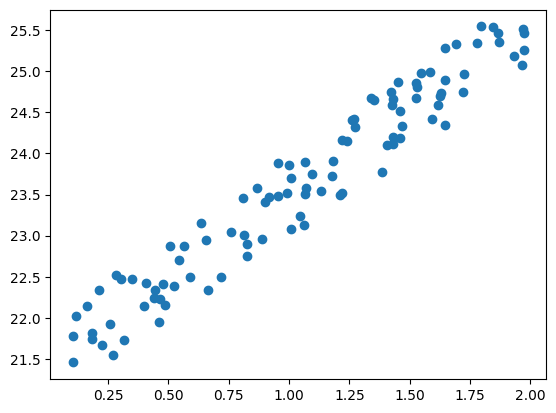

In [5]:
import matplotlib.pylab as plt
plt.scatter(X, y)

In [6]:
X_b =  np.c_[np.ones((100,1)), X]
X_b

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best #$thet0 = 2.5, theta1 = 2


#Now to make predictions using the model

X_new = np.array(([[0],[2]]))
X_new_b = np.c_[np.ones((2,1)), X_new] #add x0 = 1 to each instance

y_predict = X_new_b.dot(theta_best)

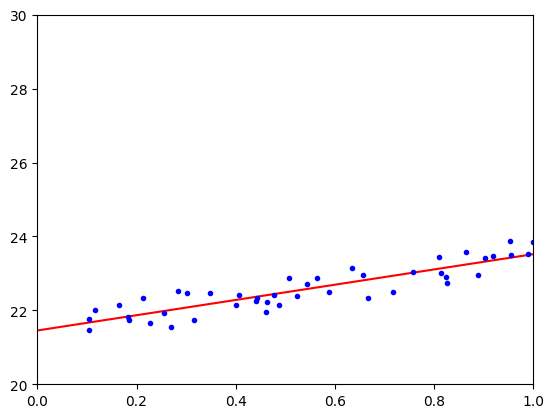

In [24]:
plt.plot(X_new, y_predict,'r-')
plt.plot(X, y, 'b.')
plt.axis([0,1,20,30])
plt.show()

In [27]:
#using sklearn 

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_ , lin_reg.coef_

(array([21.45562453]), array([[2.06481252]]))

In [29]:
lin_reg.predict(X_new)

array([[21.45562453],
       [25.58524957]])

In [30]:
#The LinearRegression class is based on teh scipy.linalg.lstsq() which stands for least squares which one could call directly:

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [31]:
theta_best_svd

array([[21.45562453],
       [ 2.06481252]])

In [33]:
#The best svd is basically the moore penrose pseudoinverse which can be computed using the np.linalg.pinv()

np.linalg.pinv(X_b).dot(y)  #theta_best_svd

array([[21.45562453],
       [ 2.06481252]])

#### Gradient Descent

In [37]:
#Simple gradient descent

eta = 0.1
n_iterations = 1000
m = 100

#Gradient Descent Step = θ − η∇θ MSE(θ)
#theta is the initial step

theta = np.random.randn(2,1)   #random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients



theta

array([[21.45562453],
       [ 2.06481252]])

In [82]:
#lets the plot the batch grad descent 
import matplotlib as mpl
def plot_grad_des(theta, eta):
    m = len(X_b)
    plt.plot(X, y,"b.")
    epochs = 1000
    n_shown = 150
    theta_path = []
    for epoch in range(epochs):
        if epoch <= n_shown:
            y_predict = X_new_b@theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch/n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle='solid', color=color)
            gradients = 2 / m * X_b.T@(X_b@theta - y)
            theta = theta - eta* gradients
            theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0,2,20,26])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(10, 4))    

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

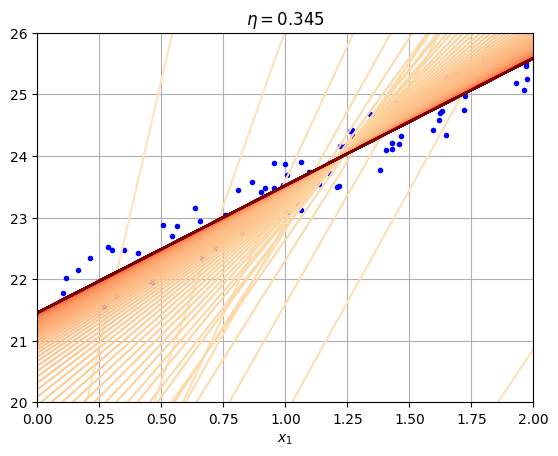

array([[ 0.49671415],
       [-0.1382643 ]])

In [84]:
plot_grad_des(theta,0.345)
plt.show()
theta

In [78]:
#Stocastic Gradient Descent using a simple learning schedule

from random import random


n_epochs = 50
t0, t1 =5, 50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t + t1)


theta =np.random.randn(2,1) # random initialization


for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)  - yi)
        eta =learning_schedule(epoch * m + i)
        theta = theta - eta * gradients


theta

array([[21.44400425],
       [ 2.07477058]])

#### Polynomial regression

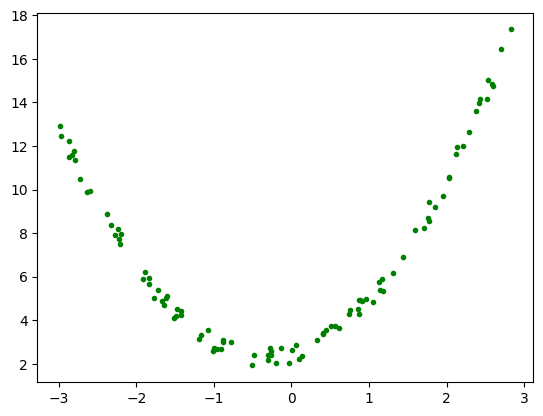

In [20]:
#First generating a polynomial function
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
m = 100
X = 6*np.random.rand(m,1) - 3
y = 1.5*X**2 + X + 2 + np.random.rand(m,1)
plt.plot(X,y,'g.')

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0],X_poly[0]

(array([0.41106351]), array([0.41106351, 0.16897321]))

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression()

In [23]:
lin_reg.coef_, lin_reg.intercept_

(array([[1.00284489, 1.4893627 ]]), array([2.54665474]))

In [24]:
X_new = np.linspace(-3,3,100).reshape(m,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

(-3.0, 3.0, 2.0, 6.0)

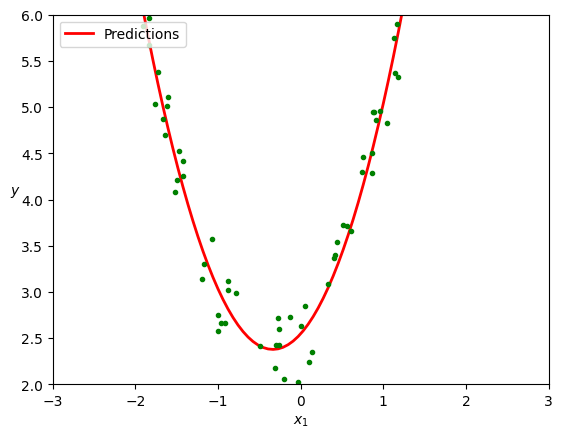

In [25]:
plt.plot(X_new,y_new,'r-', linewidth=2, label="Predictions")
plt.plot(X,y,'g.')
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc = "upper left")
plt.axis([-3,3,2,6])

#### Learning Curves

In [26]:
X = 6*np.random.rand(100,1) - 3
X_poly = poly_features.fit_transform(X)
y = 1.5*X**2 + 2*X + np.random.rand(100,1)

In [27]:
lin_reg.fit(X_poly,y)

LinearRegression()

(-3.0, 2.0, -1.0, 10.0)

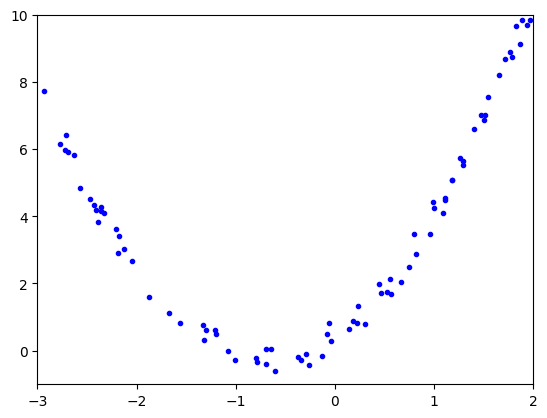

In [28]:
plt.plot(X,y,'b.')
plt.axis([-3,2,-1,10])

In [29]:
X_new = np.linspace(-3,3,100).reshape(100,1)
pf = PolynomialFeatures(degree=2)
X_new_poly = pf.fit_transform(X_new)

In [30]:
y_new = lin_reg.predict(X_new_poly)

ValueError: X has 3 features, but LinearRegression is expecting 2 features as input.

In [31]:
pf = PolynomialFeatures(degree=1)
X_poly = pf.fit_transform(X)
lin_reg.fit(X_poly, y)
X_new_poly1 = pf.transform(X_new)
y_new1= lin_reg.predict(X_new_poly1)

pf = PolynomialFeatures(degree=5)
X_poly = pf.fit_transform(X)
lin_reg.fit(X_poly, y)
X_new_poly300 = pf.transform(X_new)
y_new300= lin_reg.predict(X_new_poly300)

(-3.0, 3.0, -1.0, 10.0)

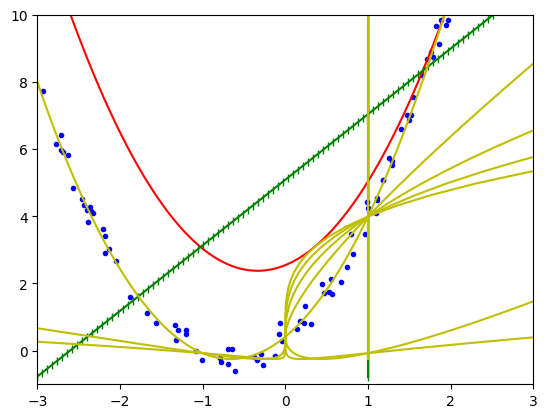

In [32]:
plt.plot(X,y,'b.')
plt.plot(X_new, y_new,'r-')
plt.plot(X_new_poly1,y_new1,'g-|')
plt.plot(X_new_poly300, y_new300, 'y-')
plt.axis([-3,3,-1,10])

#As seen in the yellow it largely tries to overfit the data

In [33]:
#A way to tell if the model is overfitting or underfitting the data is by using the learning curves


#Lets define a function first

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=2, label='val')
    plt.legend()
    plt.ylabel('$RMSE$')
    plt.xlabel('no of rows')

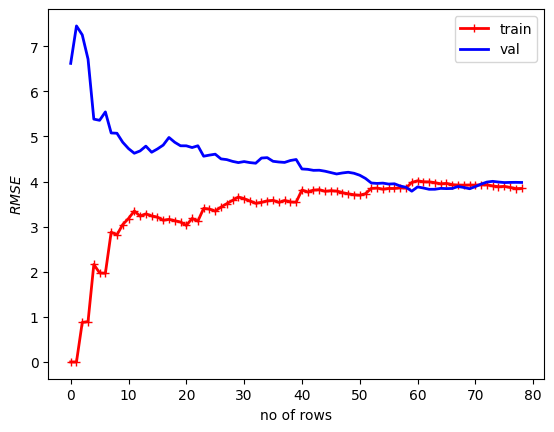

In [37]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

#However this was done using simple straight line fitting the data
#Which is quite problematic considering the X and y have quadratic relations

In [120]:
#Now will try using 5 degree polynomial and check if it betters the rmse

(0.0, 50.0, 0.0, 2.0)

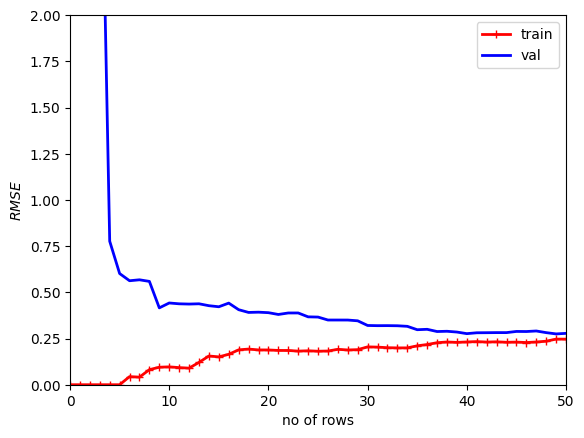

In [49]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([("poly_features", PolynomialFeatures(degree=5, include_bias=False)), ("lin_reg", LinearRegression())])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0,50,0,2])

### Regularized Linear Models

##### Ridge Regression

###### J (θ) = MSE(θ) + Reg term


In [258]:
import numpy as np
X = 17*np.random.rand(100,1) - 3
y = 2*X**3 + X**2 + 1000*np.random.rand(100,1)

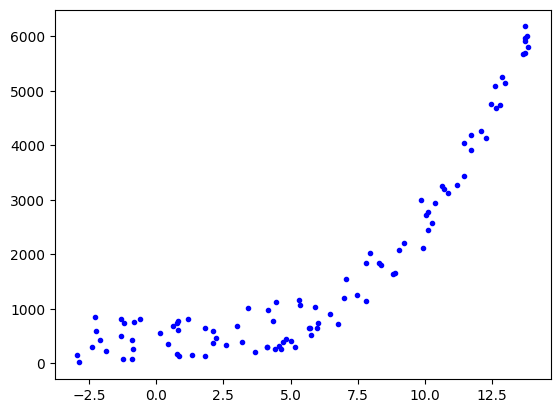

In [259]:
import matplotlib.pylab as plt
%matplotlib inline

plt.plot(X,y,'b.')
#plt.axis([-15,10,-6000,2000])

In [143]:
#We will try to fit it using Ridge Regression

from sklearn.linear_model import Ridge, LinearRegression
lin_reg = LinearRegression()
rig_reg = Ridge(alpha=0)
  

In [260]:
X_new = np.linspace(-2.5,15,100).reshape(100,1)
#Linspace for linearly spaced incremental

In [261]:
#Fitting the model

lin_reg.fit(X,y)  #no polynomial just as a linear function

y_pred = lin_reg.predict(X_new)

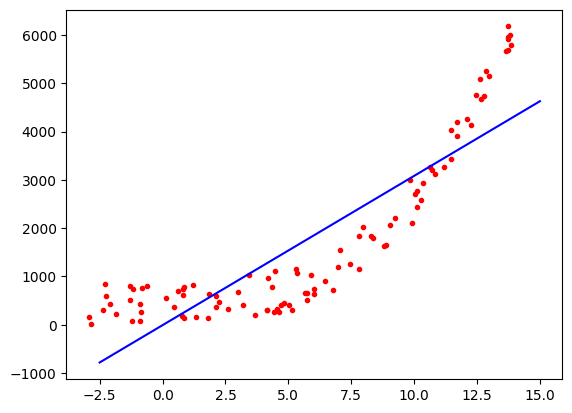

In [262]:
plt.plot(X, y,'r.')
plt.plot(X_new,y_pred,'b-')
#Tries to fit the data but clearly it is not the one we were hoping for
#As the function is a polynomial we will have to modify accordingly

In [263]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_2 = poly_features.fit_transform(X)

In [264]:
#now we will train the model
lin_reg.fit(X_2,y)

LinearRegression()

In [265]:
X_new2 = poly_features.transform(X_new)
y_pred2 = lin_reg.predict(X_new2)

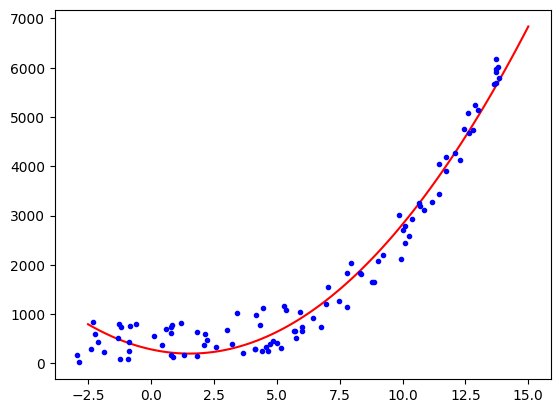

In [266]:
plt.plot(X_new,y_pred2,'r-')
plt.plot(X,y,'b.')
#what happens if we increase the degree

In [267]:
poly_features = PolynomialFeatures(degree=3)
X_3 = poly_features.fit_transform(X)
lin_reg.fit(X_3,y)
X_new3 = poly_features.transform(X_new)
y_pred3 = lin_reg.predict(X_new3)

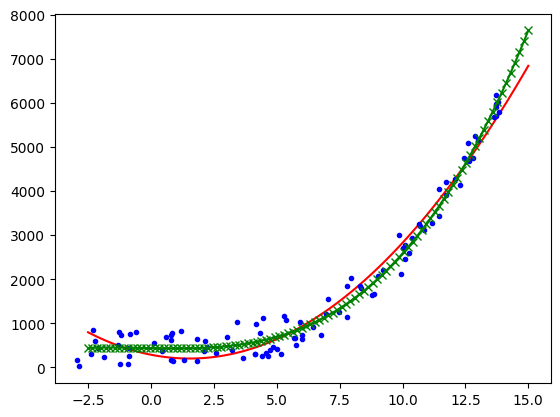

In [268]:
plt.plot(X_new,y_pred2,'r-')
plt.plot(X,y,'b.')
plt.plot(X_new,y_pred3,'gx-')

In [269]:
poly_features = PolynomialFeatures(degree=9)
X_4 = poly_features.fit_transform(X)
lin_reg.fit(X_4,y)
X_new4 = poly_features.transform(X_new)
y_pred4 = lin_reg.predict(X_new4)

(-2.5, 20.0, 0.0, 5000.0)

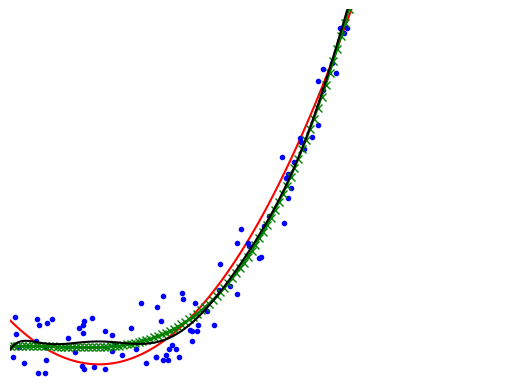

In [270]:
plt.plot(X_new,y_pred2,'r-')
plt.plot(X,y,'b.')
plt.plot(X_new,y_pred3,'gx-')
plt.plot(X_new, y_pred4,'k-')
plt.axis([-2.5,20,0,5000])
plt.axis('off')
#As the 9th degree polynomial largely tries to overfit the data

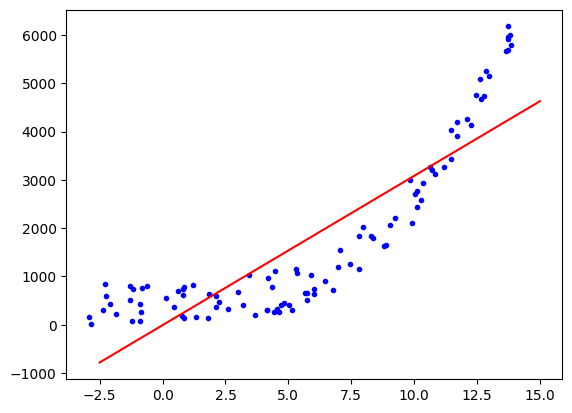

In [271]:
#Now we will try with ridge regression
rig_reg = Ridge(alpha=0)
rig_reg.fit(X,y)
y_pred = rig_reg.predict(X_new)
plt.plot(X,y,'b.')
plt.plot(X_new,y_pred,'r-')

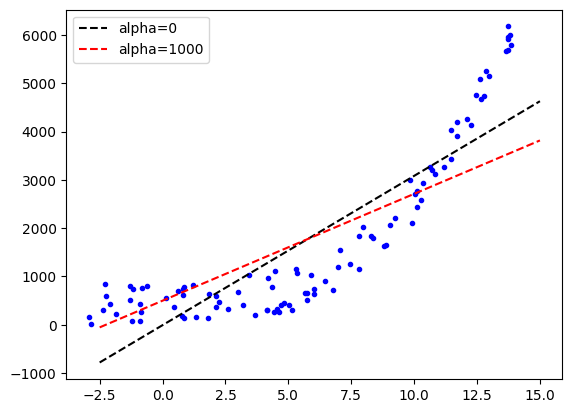

In [272]:
#Now we will change the alpha and recheck
rig_reg = Ridge(alpha=1000)
rig_reg.fit(X,y)
y_pred1000 = rig_reg.predict(X_new)
plt.plot(X,y,'b.')
plt.plot(X_new,y_pred,'k--',label='alpha=0')
plt.plot(X_new,y_pred1000,'r--',label='alpha=1000')
plt.legend()

In [280]:
#Now we modify the function using poly features

poly_features = PolynomialFeatures(degree=2)
X_3 = poly_features.fit_transform(X,y)
rig_reg.fit(X_3, y)
X_new3 = poly_features.transform(X_new)
y_pred3 = rig_reg.predict(X_new3)

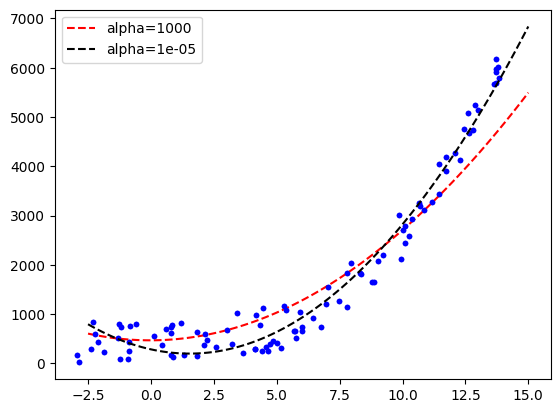

In [287]:
rig_reg = Ridge(alpha=100000)
rig_reg.fit(X_3,y)
y_pred1000 = rig_reg.predict(X_new3)
plt.plot(X,y,'b.')
plt.plot(X_new,y_pred1000,'r--',label='alpha=1000')
plt.legend()
rig_reg = Ridge(alpha=1e-05)
rig_reg.fit(X_3,y)
y_pred3 = rig_reg.predict(X_new3)
plt.plot(X,y,'b.')
plt.plot(X_new,y_pred3,'k--',label='alpha=1e-05')
plt.legend()

#### Clearly with higher alpha the curve goes flatter

In [293]:
#Ridge regression with scikit learn using a closed form solutino

from sklearn.linear_model import Ridge, SGDRegressor
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])


#And using Stochastic Gradient Descnet

sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

#using l2 norm as penalty implies the 1/2 the square of l2 
#which is same as ridge regression

array([495.57119702])

#### Lasso Regression

In [ ]:
#Least Absolute Shrinkage and Selection Operator Regresssion
#or LASSO

from sklearn.linear_model import Lasso
las_reg = Lasso(alpha=10000)
las_reg.fit(X_4,y)
y_pred = las_reg.predict(X_new4)

from sklearn.linear_model import Lasso
las_reg = Lasso(alpha=10)
las_reg.fit(X_4,y)
y_pred2 = las_reg.predict(X_new4)


(-2.5, 7.5, -1.0, 2000.0)

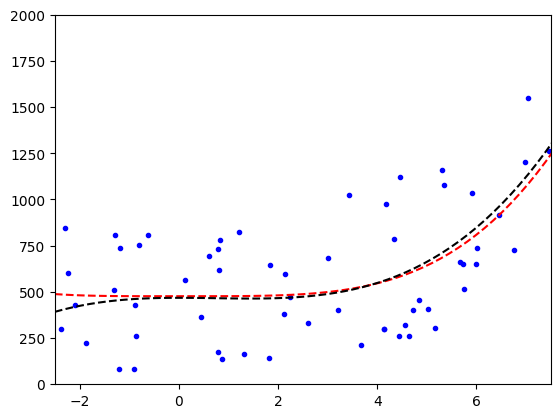

In [309]:

plt.plot(X,y,'b.')
plt.plot(X_new,y_pred,'r--',label='alpha=1000')
plt.plot(X_new,y_pred2,'k--')
plt.axis([-2.5,7.5,-1,2000])

In [2]:
#extra code - this BIG cell generates the following figure
import numpy as np
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)   #takes the above two vectors and fills the value of each other to form a matrix of 500x500

T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1,1], [1, -1], [1,0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t_min_idx

...

Ellipsis

#### Elastic Net

In [ ]:
#It is in between Lasso and Ridge with an extra parameter r which can be controlled

#As a thumb rule simple linear regression should never be used

#Ridge should be default however If there are few features useful then one should consider using the Lasson or elastic net because they tend to reduce the useless features

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])


#### Early Stopping

In [10]:
#The method of stopping further training once the validation error reaches its minimum.

#lets take the following
import numpy as np
import matplotlib.pylab as plt
X = np.random.rand(10000,1)
y = X**2 + 4*X + 10*np.random.rand(10000,1)
y = y.reshape(10000,1)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=43)

In [ ]:
#now to train the model
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=43)
sgd_reg = SGDRegressor(penalty='elasticnet',l1_ratio=0.2)
train_rmse = []
epoch = []
val_rmse = []
for i in range(1,10000):
    sgd_reg.fit(X_train[:i],y_train[:i])
    tr_ypred = sgd_reg.predict(X_train)
    trmse = np.sqrt(mean_squared_error(y_train,tr_ypred))
    train_rmse.append(trmse)
    epoch.append(i)
    ts_ypred = sgd_reg.predict(X_val)
    tsrmse = np.sqrt(mean_squared_error(y_val,ts_ypred))
    val_rmse.append(tsrmse)

In [11]:
len(train_rmse), len(val_rmse)

(6945, 6945)

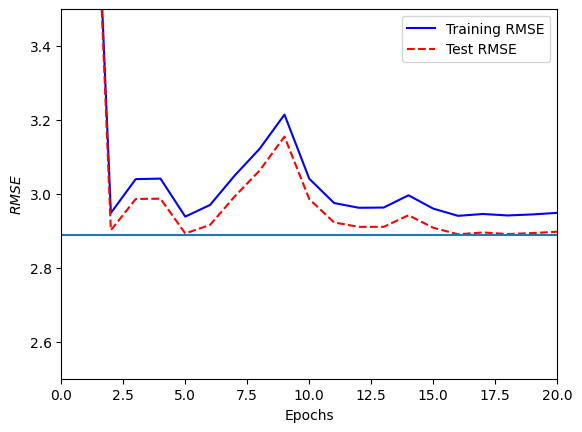

In [68]:
plt.plot(epoch, train_rmse,'b-',label='Training RMSE')
plt.plot(epoch, val_rmse,'r--',label='Test RMSE')
plt.axis([0,20,2.5,3.5])
plt.axhline(y=2.89)
plt.ylabel('$RMSE$')
plt.xlabel('Epochs')
plt.legend()

#As from the graph we can clearly see the rmse reaches minimum
#at nearly around an epoch of 5
#and even after increasing the features the rmse doesnt improve
#So it is good enough to fit the model with just only 5
#rows of data rather than full 10000 rows 
#this is called Early Stopping

In [12]:
#A basic implementation of early stopping

array([[0.41431353],
       [0.97653618],
       [0.57088413],
       ...,
       [0.93119034],
       [0.84709492],
       [0.25696005]])

In [5]:
from sklearn.base import clone
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#prepare the data

poly_scaler = Pipeline([("poly_features", PolynomialFeatures(degree=90, include_bias=False)),('std_scaler',StandardScaler())])

In [15]:
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

In [ ]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it leftoff
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

#Here the warm_start=True is when the fit() method is called it continues training where it left off, instead of restaring from scratch

In [20]:
best_epoch, minimum_val_error

(582, 8.176929258782133)

#### Logistic Regression

In [19]:
#using the iris dataset

from sklearn import datasets
import numpy as np
import matplotlib.pylab as plt
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [20]:
X = iris['data'][:,3:]  #taking only the petal_width
y = (iris['target'] == 2).astype(int) #1 where 2 is true else o
iris['target']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
#Now lets train a logistic regression model:

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

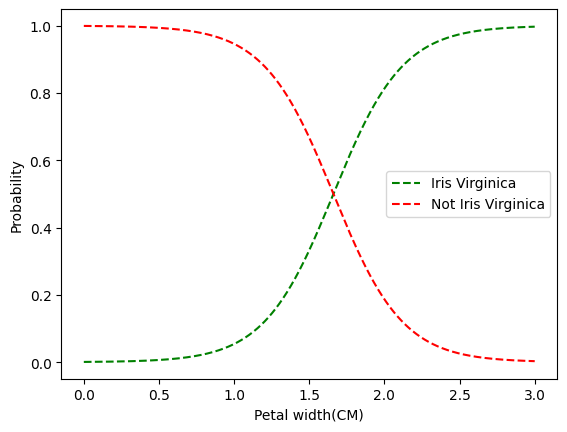

In [13]:
#since we trained the model on petal length 
#Lets make a new dataset

X_new = np.linspace(0,3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:,1],'g--',label='Iris Virginica')
plt.plot(X_new, y_proba[:,0],'r--',label='Not Iris Virginica')
plt.xlabel('Petal width(CM)')
plt.ylabel('Probability')
plt.legend()

In [14]:
for i in range(len(y_proba)):
    if y_proba[i,0] < y_proba[i,1]:
        print(i)
        break

#finds the first index where it matches the condition

553


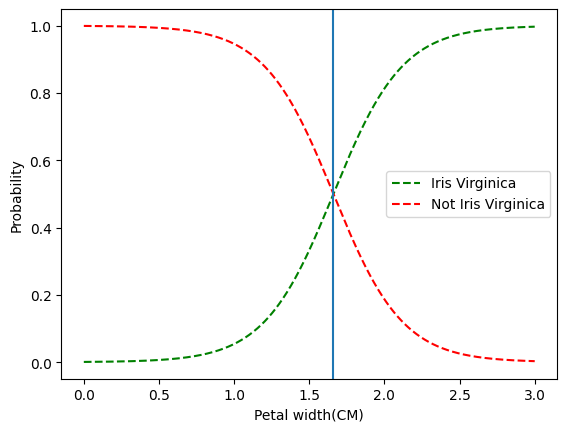

In [15]:
plt.plot(X_new, y_proba[:,1],'g--',label='Iris Virginica')
plt.plot(X_new, y_proba[:,0],'r--',label='Not Iris Virginica')
plt.xlabel('Petal width(CM)')
plt.ylabel('Probability')
plt.legend()
plt.axvline(X_new[553])

In [16]:
#So there is a little bit of hindrance in the confidence in 1.6cm
#hence
log_reg.predict([[1.7],[1.5]])
#show 1 for 1.7 but 0 for 1.5
#Incase of Logistic Regression also the regularization parameter can be tuned using the C parameter

array([1, 0])

##### Softmax Regression

In [17]:
#The regression model can be generalized to train on multiple classes without having to train and combine multiple binary classifiers. This is called Softmax regression or Multinomial Logistic Regression

In [18]:
#It first computes the score for each class k then estimates the probability of each class by applying the softmax function

#Once you have computed the score of every class for the instance x you can estimate the probability p that the instance belongs to class k by running the scores through the softmax function

#SOFTMAX FUNCTION

#To compute the probability of an element belonging to a particular class the function first computes the scores of individual classes then divides the exp(score) with the sum total of all the exp(score) of classes thus retreiving the probability for each class then assigning the element to the class of highest probability!

In [ ]:
#Hence in this sence
#pred_y = argmax(prob(s(x)))

In [13]:
#Lets use softmax to classify the iris floweres into threee classesw

X = iris['data'][:,(2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
#softmax_reg.fit(X, y)

NameError: name 'iris' is not defined

In [22]:
softmax_reg.predict([[5,2]])

array([2])

In [23]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

### Excercises

In [24]:
#Lasso or Elastic Net, However if more features are useful we will use ridge regression

#correct and = sgd, batch, mini if lasso/elastic/linear is used the complexity will grow


In [1]:
#2 Linear Regression, SGDregression, LogisticRegression suffer from different scales

#because if the features have different scales the cost function of the regression will tend to give high importance to the high values and low importance to lower values and hence the cost function will be highly biased to wards the higher values thus giving false predictions

#One way to solve this is to remove unnecessary features or using standard scaler to scale the values then feed to the data


In [2]:
#3 Logistic regression cost function follows sigmoid function hence there is no chance of getting stuck in local minimum

In [3]:
#4 If the batch gradient descent is run long enough it might reach the local minimum provied using appropriate learning rate and the gradients dont overshoot the minimum and keep on increasing

#However stochastic gd selects a batch and trains the model then validates the model on a single validation data then predicts ;depending on the score it further calibrates/approximates the gradient and can reach the same model as the batch on

#However for mini batch is selects random batches and calculates the gradient on this thus will not lead to a simillar model

In [4]:
#5 That is a symbolic indication of being the learning rate being too high that it has already overshot the minimum and is keeping on increasing



In [15]:
#6
#the correct ans is
"""Due to their random nature, neither Stochastic Gradient Descent
nor Mini-batch Gradient Descent is guaranteed to make progress
at every single training iteration. So if you immediately stop
training when the validation error goes up, you may stop much
too early, before the optimum is reached. A better option is to
save the model at regular intervals; then, when it has not
improved for a long time (meaning it will probably never beat the
record), you can revert to the best saved model."""

'Due to their random nature, neither Stochastic Gradient Descent\nnor Mini-batch Gradient Descent is guaranteed to make progress\nat every single training iteration. So if you immediately stop\ntraining when the validation error goes up, you may stop much\ntoo early, before the optimum is reached. A better option is to\nsave the model at regular intervals; then, when it has not\nimproved for a long time (meaning it will probably never beat the\nrecord), you can revert to the best saved model.'

In [6]:
#7 SGD will lead to the optimal solution fastest
#However the Batch will actually converge
#SGD and Mini Batch will bounce around the minimum and will never actually converge

In [7]:
#8 This is an indication of a largely overfed model
#to solve this we can remove some of the features from the data(other way to say is reduce the polynomial degrees)
#We can also reduce the size of the training set(solution in the book given as adding a regularization term eg l2(ridge) or l1(lasso))
#We can add more data to the training set

In [8]:
#9 The model is underfed and largely biased
#To solve this we should decrease the regularizatin hyperparameter or alpha

In [9]:
#10 a> Ridge or Lasso regression has the ability to reduce the unneccessary features thus decreasing training time and lowering the chance of overfitting

#b> when we want the regularization hyperparameter to be l1 norm rather than l2 norm as ridge uses l2 norm and lasso uses l1 norm

#c> When im not sure about whether to choose between l1 and l2 as well as if i want l2 and l1 in my regression then i will choose elastic net

In [10]:
#11 Both of these classes are binary classes and mutually exclusive as outdoor can be during daytime and vice versa. Furthermore it is not a multiclass classification and we should avoid softmax in this case.

In [14]:

len(X)

NameError: name 'X' is not defined

In [11]:
#12
X = iris['data'][:,(2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

epoch = []
early_stopping = []
min_error = []

for epoch in range(1,1000):
    
    

NameError: name 'softmax_reg' is not defined